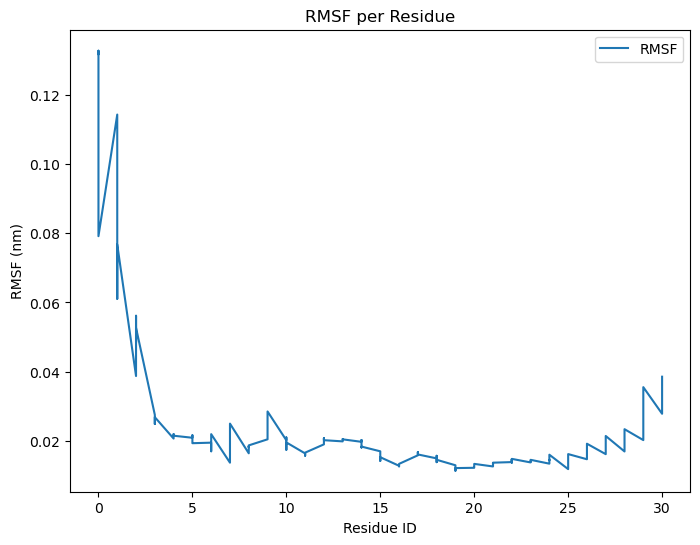

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# 获取所有 PDB 文件名
pdb_files = sorted(glob.glob('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week7-Alphafold/Input/1v1d/*.pdb'))

# 将所有 PDB 文件加载为一个轨迹
trajectory = md.load(pdb_files)

# 对所有帧进行超位，使用第一个帧作为参考
trajectory.superpose(trajectory[0], atom_indices=trajectory.topology.select('backbone'))

# 计算 RMSF（针对 backbone 原子）
backbone_indices = trajectory.topology.select('backbone')
rmsf = md.rmsf(trajectory, trajectory[0], atom_indices=backbone_indices)

# 获取与 backbone 对应的残基 ID
residue_ids = [trajectory.topology.atom(i).residue.index for i in backbone_indices]

# 绘制 RMSF 与残基 ID 的关系图
plt.figure(figsize=(8,6))
plt.plot(residue_ids, rmsf, label="RMSF")
plt.xlabel('Residue ID')
plt.ylabel('RMSF (nm)')
plt.title('RMSF per Residue')
plt.legend()
plt.show()
